**Configuracion inicial del entorno**

In [12]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Perceptrons

The Perceptron is one of the simplest ANN architectures, It is based on a slightly different artificial neuron called
a linear threshold unit (LTU), The most common step function used in Perceptrons is the Heaviside step function

A single LTU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM).

The decision boundary of each output neuron is linear, so Perceptrons are incapable
of learning complex patterns (just like Logistic Regression classifiers). However, if the
training instances are linearly separable, Rosenblatt demonstrated that this algorithm
would converge to a solution.7 This is called the Perceptron convergence theorem.
Scikit-Learn provides a Perceptron class that implements a single LTU network. It
can be used pretty much as you would expect

Note: we set max_iter and tol explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [13]:
# Ejemplo de clasificación con perceptron 

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) # clasificador binario si es la clase 0 entonces 1 sino 0

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred[0]

1

Saving figure perceptron_iris_plot


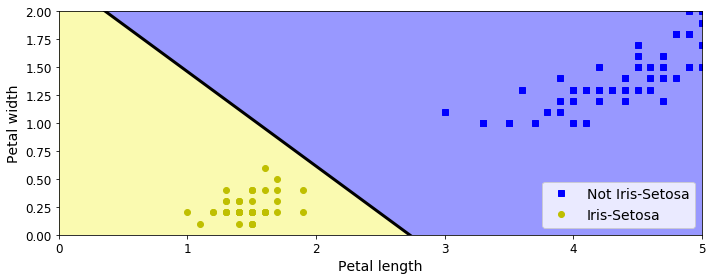

In [15]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class
probability; rather, they just make predictions based on a hard threshold. This is one
of the good reasons to prefer Logistic Regression over Perceptrons. 

However, it turns out that some of the limitations of Perceptrons can be eliminated by
stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron
(MLP).

For many years researchers struggled to find a way to train MLPs, without success.
But in 1986, D. E. Rumelhart et al. published a groundbreaking article8 introducing
the backpropagation training algorithm.9 Today we would describe it as Gradient
Descent

In order for this algorithm to work properly, the authors made a key change to the MLP’s architecture: they replaced the step function with the logistic function, σ(z) = 1 / (1 + exp(–z)). 

This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere,
allowing Gradient Descent to make some progress at every step. The backpropagation
algorithm may be used with other activation functions, instead of the logistic
function as The hyperbolic tangent function tanh (z) = 2σ(2z) – 1, and ReLU

An MLP is often used for classification, with each output corresponding to a different
binary class (e.g., spam/ham, urgent/not-urgent, and so on). When the classes are
exclusive (e.g., classes 0 through 9 for digit image classification), the output layer is
typically modified by replacing the individual activation functions by a shared **softmax
function**

The output of each neuron corresponds to the estimated probability of the corresponding
class. 

# Activation functions

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)



Saving figure activation_functions_plot


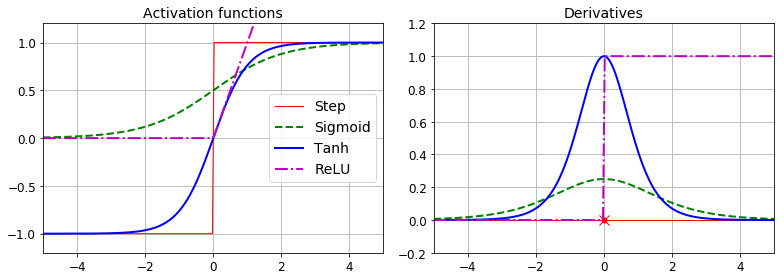

In [22]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# Training an MLP with TensorFlow’s High-Level API

The DNNClassifier class
makes it trivial to train a deep neural network with any number of hidden layers, and
a softmax output layer to output estimated class probabilities. For example, the following
code trains a DNN for classification with two hidden layers (one with 300
neurons, and the other with 100 neurons) and a softmax output layer with 10
neurons:
    
    

In [24]:
import tensorflow as tf

In [26]:
# descargamos el dataset y llega dividido en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 
# escalamos nuestros datos
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [27]:
# Por debajo el DNNClassifier crea todas las capas de las neuronnas con la activación reLU, la capa de salida es softmax
# y la función de costo es cross entropy

feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpmy_693qk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C1F8193B70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 int

INFO:tensorflow:global_step/sec: 304.771
INFO:tensorflow:loss = 1.4151073, step = 7201 (0.344 sec)
INFO:tensorflow:global_step/sec: 256.004
INFO:tensorflow:loss = 1.402887, step = 7301 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.814
INFO:tensorflow:loss = 0.05153321, step = 7401 (0.379 sec)
INFO:tensorflow:global_step/sec: 294.3
INFO:tensorflow:loss = 0.28492793, step = 7501 (0.340 sec)
INFO:tensorflow:global_step/sec: 306.128
INFO:tensorflow:loss = 0.69301033, step = 7601 (0.327 sec)
INFO:tensorflow:global_step/sec: 287.483
INFO:tensorflow:loss = 0.11691596, step = 7701 (0.348 sec)
INFO:tensorflow:global_step/sec: 295.509
INFO:tensorflow:loss = 0.23245269, step = 7801 (0.342 sec)
INFO:tensorflow:global_step/sec: 247.597
INFO:tensorflow:loss = 0.5992082, step = 7901 (0.404 sec)
INFO:tensorflow:global_step/sec: 282.506
INFO:tensorflow:loss = 0.32418403, step = 8001 (0.350 sec)
INFO:tensorflow:global_step/sec: 288.01
INFO:tensorflow:loss = 0.31692898, step = 8101 (0.347 sec)
INFO:te

INFO:tensorflow:global_step/sec: 290.844
INFO:tensorflow:loss = 0.07508599, step = 15401 (0.344 sec)
INFO:tensorflow:global_step/sec: 299.8
INFO:tensorflow:loss = 0.049644165, step = 15501 (0.330 sec)
INFO:tensorflow:global_step/sec: 266.278
INFO:tensorflow:loss = 0.35805792, step = 15601 (0.376 sec)
INFO:tensorflow:global_step/sec: 239.071
INFO:tensorflow:loss = 0.034882016, step = 15701 (0.418 sec)
INFO:tensorflow:global_step/sec: 289.436
INFO:tensorflow:loss = 0.013743327, step = 15801 (0.345 sec)
INFO:tensorflow:global_step/sec: 258.7
INFO:tensorflow:loss = 0.02327807, step = 15901 (0.391 sec)
INFO:tensorflow:global_step/sec: 242.639
INFO:tensorflow:loss = 0.17563592, step = 16001 (0.408 sec)
INFO:tensorflow:global_step/sec: 229.637
INFO:tensorflow:loss = 0.09747389, step = 16101 (0.439 sec)
INFO:tensorflow:global_step/sec: 274.156
INFO:tensorflow:loss = 0.036976445, step = 16201 (0.365 sec)
INFO:tensorflow:global_step/sec: 304.269
INFO:tensorflow:loss = 0.035259128, step = 16301 (

INFO:tensorflow:global_step/sec: 283.878
INFO:tensorflow:loss = 0.018914584, step = 23501 (0.337 sec)
INFO:tensorflow:global_step/sec: 285.766
INFO:tensorflow:loss = 0.06521442, step = 23601 (0.350 sec)
INFO:tensorflow:global_step/sec: 293.94
INFO:tensorflow:loss = 0.14035386, step = 23701 (0.340 sec)
INFO:tensorflow:global_step/sec: 298.33
INFO:tensorflow:loss = 0.005644392, step = 23801 (0.335 sec)
INFO:tensorflow:global_step/sec: 289.432
INFO:tensorflow:loss = 0.04311054, step = 23901 (0.346 sec)
INFO:tensorflow:global_step/sec: 293.733
INFO:tensorflow:loss = 0.076620355, step = 24001 (0.340 sec)
INFO:tensorflow:global_step/sec: 282.861
INFO:tensorflow:loss = 0.00853804, step = 24101 (0.354 sec)
INFO:tensorflow:global_step/sec: 265.284
INFO:tensorflow:loss = 0.0033151496, step = 24201 (0.381 sec)
INFO:tensorflow:global_step/sec: 233.714
INFO:tensorflow:loss = 0.042507786, step = 24301 (0.428 sec)
INFO:tensorflow:global_step/sec: 259.776
INFO:tensorflow:loss = 0.0019807392, step = 24

INFO:tensorflow:global_step/sec: 185.141
INFO:tensorflow:loss = 0.05629108, step = 31601 (0.540 sec)
INFO:tensorflow:global_step/sec: 207.117
INFO:tensorflow:loss = 0.01789702, step = 31701 (0.483 sec)
INFO:tensorflow:global_step/sec: 277.776
INFO:tensorflow:loss = 0.014279717, step = 31801 (0.360 sec)
INFO:tensorflow:global_step/sec: 254.265
INFO:tensorflow:loss = 0.034381576, step = 31901 (0.393 sec)
INFO:tensorflow:global_step/sec: 282.206
INFO:tensorflow:loss = 0.037049163, step = 32001 (0.370 sec)
INFO:tensorflow:global_step/sec: 273.537
INFO:tensorflow:loss = 0.007023514, step = 32101 (0.350 sec)
INFO:tensorflow:global_step/sec: 234.931
INFO:tensorflow:loss = 0.0083578415, step = 32201 (0.426 sec)
INFO:tensorflow:global_step/sec: 258.522
INFO:tensorflow:loss = 0.015077637, step = 32301 (0.387 sec)
INFO:tensorflow:global_step/sec: 232.829
INFO:tensorflow:loss = 0.02692744, step = 32401 (0.429 sec)
INFO:tensorflow:global_step/sec: 189.23
INFO:tensorflow:loss = 0.047678366, step = 3

INFO:tensorflow:global_step/sec: 291.755
INFO:tensorflow:loss = 0.03037815, step = 39701 (0.343 sec)
INFO:tensorflow:global_step/sec: 299.809
INFO:tensorflow:loss = 0.017411822, step = 39801 (0.334 sec)
INFO:tensorflow:global_step/sec: 275.486
INFO:tensorflow:loss = 0.019538432, step = 39901 (0.363 sec)
INFO:tensorflow:global_step/sec: 284.627
INFO:tensorflow:loss = 0.032624297, step = 40001 (0.351 sec)
INFO:tensorflow:global_step/sec: 275.92
INFO:tensorflow:loss = 0.014556628, step = 40101 (0.362 sec)
INFO:tensorflow:global_step/sec: 298.076
INFO:tensorflow:loss = 0.00593584, step = 40201 (0.335 sec)
INFO:tensorflow:global_step/sec: 288.409
INFO:tensorflow:loss = 0.004059629, step = 40301 (0.347 sec)
INFO:tensorflow:global_step/sec: 313.518
INFO:tensorflow:loss = 0.005650109, step = 40401 (0.335 sec)
INFO:tensorflow:global_step/sec: 275.612
INFO:tensorflow:loss = 0.0532168, step = 40501 (0.347 sec)
INFO:tensorflow:global_step/sec: 286.577
INFO:tensorflow:loss = 0.03993147, step = 4060

# Using plain TensorFlow

If you want more control over the architecture of the network, you may prefer to use
TensorFlow’s lower-level Python API The first step is the construction
phase, building the TensorFlow graph. The second step is the execution
phase, where you actually run the graph to train the model.

## Construction Phase

In [29]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [30]:
reset_graph()
# placeholder para los datos de entrenamiento y objetivo
# definimos la estructura de entrada, número de entrada en el primer parámetro de shape y en el segundo el número
# de caracterisitica
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [31]:
# crearemos las capas

def neuron_layer(X, n_neurons, name, activation=None):
    # creamos un name scope que contiene todos los nodoso computacionales de la capa
    # de esta forma podemos verlo mucho mejor en TensorBoard
    with tf.name_scope(name):
        
        # este bloque con el fin de inicializar los pesos de forma aleatoria utilizando
        # una distribución normal truncada, y con una desviación estandar de 2/raiz(entradas)
        # esto ayuda mucho al algoritmo a converger mucho más rápido 
        
        #Using a truncated normal distribution rather than a regular normal distribution ensures that there won’t be
        # any large weights, which could slow down training.
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        
        # BIAS
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # z = W.X + b
        Z = tf.matmul(X, W) + b
        
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [32]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [33]:
# todo lo anterior se podría reemplazar con la función de tensor flow fully_connected
# y de esa forma no tendría que definir mi propia función "neuron layer"

# from tensorflow.contrib.layers import fully_connected
# with tf.name_scope("dnn"):
#     hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
#     hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
#     logits = fully_connected(hidden2, n_outputs, scope="outputs",
#     activation_fn=None)

In [34]:
# Ahora vamos a crear nuestra función de costos y vamos a utilizar cross entropy will penalize 
# models that estimate a low probability for the target class

# sparse_soft_max_cross_entropy_with_logits(), it computes the cross entropy based on the
# “logits” (i.e., the output of the network before going through the softmax activation
# function), and it expects labels in the form of integers ranging from 0 to the number
# of classes minus 1 (in our case, from 0 to 9). This will give us a 1D tensor containing
# the cross entropy for each instance. We can then use TensorFlow’s reduce_mean()
# function to compute the mean cross entropy over all instances.

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

The sparse_softmax_cross_entropy_with_logits() function is
equivalent to applying the softmax activation function and then
computing the cross entropy, but it is more efficient, and it properly
takes care of corner cases like logits equal to 0. This is why we
did not apply the softmax activation function earlier. There is also
another function called softmax_cross_entropy_with_logits(),
which takes labels in the form of one-hot vectors (instead of ints
from 0 to the number of classes minus 1).

In [35]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [36]:
# We will simply use accuracy as our performance measure. First, for each instance, determine if the neural network’s 
# prediction is correct by checking whether or not the highest logit corresponds to the target class. 
# For this you can use the in_top_k() function. This returns a 1D tensor full of boolean values, so we need to
# cast these booleans to floats and then compute the average. This will give us the network’s overall accuracy.
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [37]:

init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Execution Phase

In [39]:
n_epochs = 40
batch_size = 50

In [40]:

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [41]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.9628
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.9668
13 Batch accuracy: 0.98 Val accuracy: 0.9704
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9738
17 Batch accuracy: 1.0 Val accuracy: 0.974
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9744
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.9758
22 Batch accuracy: 0.98 Val acc

## Using the Neural Network

In [53]:
# First the code loads the model parameters from disk. Then it loads some new images
# that you want to classify. Remember to apply the same feature scaling as for the training
# data (in this case, scale it from 0 to 1). Then the code evaluates the logits node.
# If you wanted to know all the estimated class probabilities, you would need to apply
# the softmax() function to the logits, but if you just want to predict a class, you can
# simply pick the class that has the highest logit value (using the argmax() function does the trick).

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [54]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [67]:
from tensorflow_graph_in_jupyter import show_graph

show_graph(tf.get_default_graph())

## Using dense() instead of neuron_layer()

In [57]:

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9374
3 Batch accuracy: 0.9 Validation accuracy: 0.9418
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9514
6 Batch accuracy: 1.0 Validation accuracy: 0.9546
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9652
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.9748
19 Batch accuracy: 0.96 Vali

In [68]:
from tensorflow_graph_in_jupyter import show_graph

show_graph(tf.get_default_graph())

# Fine-Tuning Neural Network Hyperparameters

in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to
use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

Of course, you can use grid search with cross-validation to find the right hyperparameters,but since there are many hyperparameters to tune, and since training a neural network on a large dataset takes a lot of time, you will only be able to explore a tiny part of the hyperparameter space in a reasonable amount of time. 

It is much better to use randomized search, Another option is to use a tool such as Oscar, http://oscar.calldesk.ai/ 
which implements more complex algorithms to help you find a good set of hyperparameters quickly.

It helps to have an idea of what values are reasonable for each hyperparameter, so you
can restrict the search space.

## Number of neurons per Hidden Layer

Obviamente el número de neruoanes en la capa de entrada y de salida está determinado por el tipo de entrada y salida que necesitemos

Pero para las capas ocultas una práctica común es dimensionarlas en forma de embudo,con menos y menos neuronas en cada capa 
sin embargo, no hay reglas generales sobre esto

Una técnica o estrategia útil sería el coger un modelo con más capas y neuronas de las que creemos necesitar y luego ir reduciendolas lo necesario

## Activation Functions

In most cases you can use the ReLU activation function in the hidden layers (or one
of its variants) . It is a bit faster to compute than other
activation functions, and Gradient Descent does not get stuck as much on plateaus,
thanks to the fact that it does not saturate for large input values (as opposed to the
logistic function or the hyperbolic tangent function, which saturate at 1).

For the output layer, the softmax activation function is generally a good choice for
classification tasks (when the classes are mutually exclusive). **For regression tasks,
you can simply use no activation function at all.**

**Ejercicio práctico** 

Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a tf.summary.scalar() to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [59]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [60]:
# Now we need to define the directory to write the TensorBoard logs to:


from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [61]:
logdir = log_dir("mnist_dnn")

In [62]:
# Now we can create the FileWriter that we will use to write the TensorBoard logs:

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [63]:
# Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

m, n = X_train.shape


n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.240% 	Loss: 0.35380
Epoch: 5 	Validation accuracy: 95.140% 	Loss: 0.17919
Epoch: 10 	Validation accuracy: 96.520% 	Loss: 0.12783
Epoch: 15 	Validation accuracy: 97.180% 	Loss: 0.10326
Epoch: 20 	Validation accuracy: 97.520% 	Loss: 0.09165
Epoch: 25 	Validation accuracy: 97.600% 	Loss: 0.08207
Epoch: 30 	Validation accuracy: 97.760% 	Loss: 0.07884


UnknownError: Failed to rename: ./my_deep_mnist_model.data-00000-of-00001.tempstate5386106392468815553 to: ./my_deep_mnist_model.data-00000-of-00001 : Acceso denegado.
; Input/output error
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, hidden1/bias, hidden1/kernel, hidden2/bias, hidden2/kernel, outputs/bias, outputs/kernel)]]

Caused by op 'save/SaveV2', defined at:
  File "C:\Users\andre\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\andre\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\andre\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\andre\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\andre\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\andre\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\andre\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\andre\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\andre\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\andre\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-b516016620ef>", line 35, in <module>
    saver = tf.train.Saver()
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1281, in __init__
    self.build()
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 775, in _build_internal
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 275, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 193, in save_op
    tensors)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1800, in save_v2
    shape_and_slices=shape_and_slices, tensors=tensors, name=name)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\andre\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

UnknownError (see above for traceback): Failed to rename: ./my_deep_mnist_model.data-00000-of-00001.tempstate5386106392468815553 to: ./my_deep_mnist_model.data-00000-of-00001 : Acceso denegado.
; Input/output error
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, hidden1/bias, hidden1/kernel, hidden2/bias, hidden2/kernel, outputs/bias, outputs/kernel)]]


In [64]:
os.remove(checkpoint_epoch_path)

In [65]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [66]:
accuracy_val

0.9743